In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.externals.six import StringIO 
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import make_scorer
import sklearn


# XGBoost
import xgboost as xgb

# Pandas
import pandas as pd

# Numpy
import numpy as np
# Set random seed
np.random.seed(0)

# Plots
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image
import pydotplus

In [4]:
df = pd.read_csv('KeplerData.csv')
target = 'Exoplanet Archive Disposition'
# can't include these columns because they are all null
invalids = ['Equilibrium Temperature Upper Uncertainty [K]', 'Equilibrium Temperature Lower Uncertainty [K]']
# these are all the features
features = list(set(df.columns[4:]) - set(invalids))
data = df[features + [target]]
withoutna = data.dropna()

In [5]:
train, test = sklearn.model_selection.train_test_split(withoutna)
y_train = train[target]
X_train = train[features]
y_test = test[target]
X_test = test[features]

In [6]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

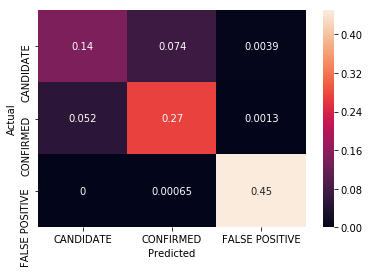

In [7]:
confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], normalize=True)
sns.heatmap(confusion, annot=True)

In [8]:
cv_scores_rf = cross_val_score(clf, X_test, y_test, cv=5)

print("Accuracy:\t\t", np.mean(cv_scores_rf))
print("Completeness:\t\t", sklearn.metrics.recall_score(y_test, y_pred, average='micro'))
print("Contamination:\t\t", 1 - sklearn.metrics.precision_score(y_test, y_pred, average='micro'))

Accuracy:		 0.8551319648093841
Completeness:		 0.8686934023285899
Contamination:		 0.13130659767141006


[('Disposition Score', 0.17553964589254342),
 ('Centroid Offset False Positive Flag', 0.08491075085642945),
 ('Planetary Radius [Earth radii]', 0.07620857171950571),
 ('Planetary Radius Upper Uncertainty [Earth radii]', 0.04298324984218886),
 ('Ephermeris Match Indicates Contamination False Positive Flag',
  0.03909344795144138),
 ('Transit Signal-to-Noise', 0.038232120263488774),
 ('Transit Depth [ppm]', 0.035508459541423336),
 ('Number of Planets', 0.0320896373849681),
 ('Maximum Multiple Event Statistic', 0.031153863155930727),
 ('Not Transit-Like False Positive Flag', 0.02913975116842591)]

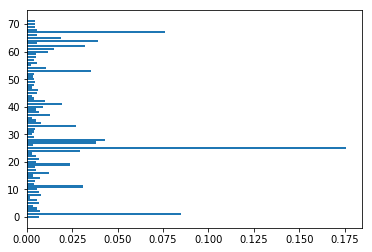

In [11]:
values = list(zip(features, clf.feature_importances_))
plt.barh(range(len(clf.feature_importances_)), [x[1] for x in values])
sortd = sorted(values, reverse = True, key= lambda x: x[1])[:10]
most_important = [s[0] for s in sortd]
sortd

Transit Duration Upper Uncertainty [hrs]  \
                                                                 count   
Exoplanet Archive Disposition                                            
CANDIDATE                                                       1695.0   
CONFIRMED                                                       2256.0   
FALSE POSITIVE                                                  3529.0   

                                                                              \
                                   mean       std      min       25%     50%   
Exoplanet Archive Disposition                                                  
CANDIDATE                      0.205785  0.123554  0.00099  0.108500  0.1870   
CONFIRMED                      0.110050  0.082845  0.00073  0.050975  0.0870   
FALSE POSITIVE                 0.125763  0.135386  0.00000  0.012500  0.0702   

                                              
                                  75%    max  
Exoplanet Archive Disposition                 
CANDIDATE                      0.2925  0.497  
CONFIRMED                      0.1480  0.499  
FALSE POSITIVE                 0.2120  0.499

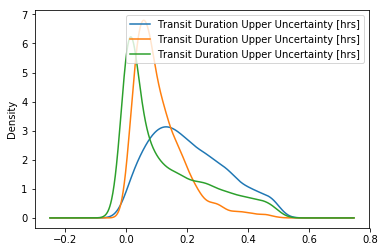

In [12]:
# here we look at the most important feature
fig, axs = plt.subplots(ncols=1)
data = df[['Transit Duration Upper Uncertainty [hrs]', target]]
data[data < .5].groupby(target).plot(kind='kde', ax=axs)
data[data < .5].groupby(target).describe()

Accuracy:		 0.8551356064246131
Completeness:		 0.8751617076326003
Contamination:		 0.12483829236739974


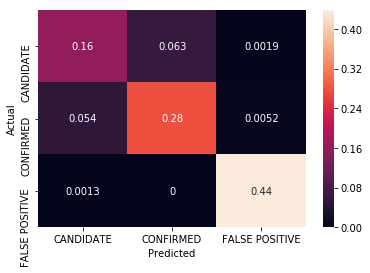

In [13]:
# Rerun using only the top 10 most important features
important = withoutna[most_important + [target]]
train, test = sklearn.model_selection.train_test_split(important)
y_train = train[target]
X_train = train[most_important]
y_test = test[target]
X_test = test[most_important]
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], normalize=True)
sns.heatmap(confusion, annot=True)
cv_scores_rf = cross_val_score(clf, X_test, y_test, cv=5)

print("Accuracy:\t\t", np.mean(cv_scores_rf))
print("Completeness:\t\t", sklearn.metrics.recall_score(y_test, y_pred, average='micro'))
print("Contamination:\t\t", 1 - sklearn.metrics.precision_score(y_test, y_pred, average='micro'))